In [335]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from scipy import stats

In [336]:
migVSmoney=pd.read_csv("Raw_Data/MigrationVSMoney31_continents.csv")
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,Average of emigration over all OECD countries,Continent
0,Afghanistan,2000.0,9.515139,0.000824,ASIA
1,Afghanistan,2001.0,7.586477,0.000947,ASIA
2,Afghanistan,2002.0,11.206747,0.000689,ASIA
3,Afghanistan,2003.0,29.388571,0.000587,ASIA
4,Afghanistan,2004.0,50.550219,0.000550,ASIA


In [337]:
migVSmoney=migVSmoney.sort_values(by="3yrAverage Money")
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,Average of emigration over all OECD countries,Continent
1216,Marshall Islands,2006.0,-440.384615,0.001750,OCEANIA
69,Antigua and Barbuda,2005.0,-196.979144,0.005315,CARRIBEANS
68,Antigua and Barbuda,2004.0,-181.707754,0.005057,CARRIBEANS
67,Antigua and Barbuda,2003.0,-172.884546,0.004000,CARRIBEANS
1219,Marshall Islands,2009.0,-103.782051,0.001558,OCEANIA


In [338]:
migVSmoney=migVSmoney[migVSmoney["Recipient"]=="Syrian Arab Republic"]

#migVSmoney=migVSmoney[migVSmoney["Continent"]=="AFRICA"]
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,Average of emigration over all OECD countries,Continent
1881,Syrian Arab Republic,2004.0,15.215201,0.000460,ASIA
1882,Syrian Arab Republic,2005.0,15.487187,0.000481,ASIA
1883,Syrian Arab Republic,2006.0,16.635655,0.000459,ASIA
1877,Syrian Arab Republic,2000.0,17.156623,0.000579,ASIA
1884,Syrian Arab Republic,2007.0,17.250521,0.000400,ASIA


In [339]:
migVSmoney=migVSmoney.rename(columns={"Average of emigration over all OECD countries":"3yrAverage Migration"})
migVSmoney

,Recipient,Report Year,3yrAverage Money,3yrAverage Migration,Continent
1881,Syrian Arab Republic,2004.0,15.215201,0.000460,ASIA
1882,Syrian Arab Republic,2005.0,15.487187,0.000481,ASIA
1883,Syrian Arab Republic,2006.0,16.635655,0.000459,ASIA
1877,Syrian Arab Republic,2000.0,17.156623,0.000579,ASIA
1884,Syrian Arab Republic,2007.0,17.250521,0.000400,ASIA
1885,Syrian Arab Republic,2008.0,18.664176,0.000411,ASIA
1880,Syrian Arab Republic,2003.0,22.879869,0.000466,ASIA
1886,Syrian Arab Republic,2009.0,23.793722,0.000429,ASIA
1878,Syrian Arab Republic,2001.0,24.041074,0.000577,ASIA
1879,Syrian Arab Republic,2002.0,25.510553,0.000515,ASIA


In [340]:
migVSmoneyQ=migVSmoney.quantile([.05, .95])
migVSmoneyQ

,Report Year,3yrAverage Money,3yrAverage Migration
0.05,2000.75,15.419191,0.000408
0.95,2014.25,115.341717,0.010761


In [341]:
MigrationUPboundary=migVSmoneyQ.iloc[1][2]
MigrationLOWboundary=migVSmoneyQ.iloc[0][2]
MoneyUPboundary=migVSmoneyQ.iloc[1][1]
MoneyLOWboundary=migVSmoneyQ.iloc[0][1]
print(MigrationUPboundary,MigrationLOWboundary)
print(MoneyUPboundary,MoneyLOWboundary)

0.0107614070781 0.000407996001536
115.341717328 15.419190854


In [342]:
df=migVSmoney
len(migVSmoney)

16

In [329]:
migVSmoneyQ = migVSmoney[(migVSmoney["3yrAverage Money"] > MoneyLOWboundary) & (migVSmoney["3yrAverage Money"] < MoneyUPboundary) ]
df = migVSmoneyQ[(migVSmoneyQ["3yrAverage Migration"] > MigrationLOWboundary) & (migVSmoneyQ["3yrAverage Migration"] < MigrationUPboundary)]
len(df)

13

In [330]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(df, columns=["Average Sum of Money"])

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(df, columns=["Average of emigration over all OECD countries"])

In [343]:
#Shapiro-Wilk
x = df['3yrAverage Money']
y = df["3yrAverage Migration"]

shapiro_results = scipy.stats.shapiro(x)

print(shapiro_results)
shapiro_results = scipy.stats.shapiro(y)

print(shapiro_results)

(0.5922832489013672, 1.3701896023121662e-05)
(0.41039973497390747, 4.181640633760253e-07)


In [344]:
x = df['3yrAverage Money']
y = df["3yrAverage Migration"]

levene_results = scipy.stats.levene(x,y)

print(levene_results)


LeveneResult(statistic=4.4808326900311792, pvalue=0.042681325384250519)


In [345]:
import statsmodels.api as sm

X = df['3yrAverage Money']
y = df["3yrAverage Migration"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     3yrAverage Migration   R-squared:                       0.918
Model:                              OLS   Adj. R-squared:                  0.912
Method:                   Least Squares   F-statistic:                     156.8
Date:                  Mon, 13 Nov 2017   Prob (F-statistic):           5.40e-09
Time:                          08:52:28   Log-Likelihood:                 80.539
No. Observations:                    16   AIC:                            -157.1
Df Residuals:                        14   BIC:                            -155.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0028      0.001     -4.740      0.000      -0.004      -0.002
3yrAverage Money     0.0001   1.11e-05     12.523      0.000       0.000       0.000
==============================================================================
Omnibus:                        7.563   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.517
Skew:                          -0.874   Prob(JB):                        0.105
Kurtosis:                       4.929   Cond. No.                         75.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

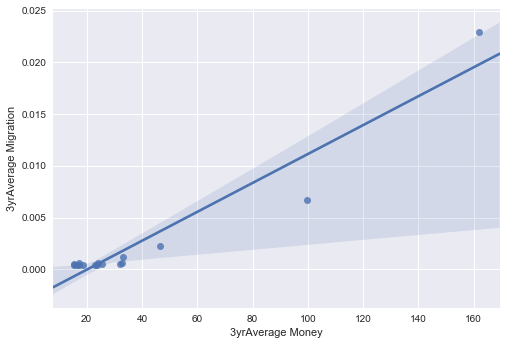

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='3yrAverage Money', y="3yrAverage Migration", data=df)
plt.show()